In [44]:
import pandas as pd
import requests
import urllib.request
import json
import os
import numpy as np
import itertools

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [15]:
data = ('The world is better place','Lancashire-born Hunt joined Liverpool from Stockton Heath in July 1958, signed by then manager Phil Taylor, celebrating his debut with a goal against Scunthorpe United in September 1959')

In [16]:
def response_predict(x):
    title, text = x
    #print(description, company_profile, benefits)
    body = {'title': title, 
            'text': text
            }
    myurl = 'http://0.0.0.0:8180/predict'
    headers = {'content-type': 'application/json; charset=utf-8'}
    response = requests.post(myurl, json=body, headers=headers)
    return response.json()['predictions']

if __name__ == '__main__':
    response = response_predict(data)
    print('предсказание',response)

предсказание 0.9505296977890628


In [17]:
X_test = pd.read_csv('x_test.csv')

In [18]:
X_test.head()

,id,title,author,text
0,14474,The Trump effect: Jack in the box and Obama's ...,miss,The Trump effect: Jack in the box and Obama's ...
1,9606,9 Breathtaking Photos Of Nature With A Generou...,miss,"Email The majesty of nature is awe-inspiring, ..."
2,14662,Comment on What Is Causing The Strange Trumpet...,MR.RANDY DOUGLAS MILLER,What Is Causing The Strange Trumpet Sounds In ...
3,6451,Bill Cunningham Looked for Subjects. And They ...,Sona Patel,Bill Cunningham worked as discreetly as he cou...
4,16590,Mexican National Found Guilty of Illegal Voting,Lana Shadwick,A Texas jury convicted a Mexican national for ...


In [19]:
response = response_predict(X_test[['title', 'text']].iloc[:1,:])
response

0.9505296977890628

In [20]:
y_pred = X_test[['title', 'text']].iloc[:1000,:].apply(lambda x:response_predict(x),1)

In [21]:
y_pred.head()

0    0.953923
1    0.962771
2    0.981596
3    0.038314
4    0.215449
dtype: float64

In [22]:
y_true = pd.read_csv('y_test.csv')

In [31]:
roc_auc_score(y_true[:1000], y_pred)

0.9957983193277311

In [37]:
precision, recall, thresholds = precision_recall_curve(y_true[:1000], y_pred)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.643350, F-Score=0.979, Precision=0.966, Recall=0.992


Confusion matrix, without normalization
[[493  17]
 [  5 485]]


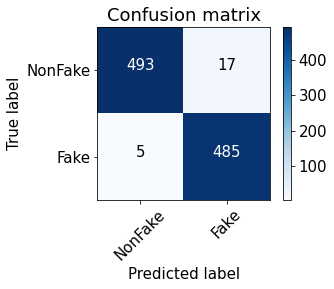

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_true[:1000], y_pred>thresholds[ix])
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['NonFake', 'Fake'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

